Dataset Link: 

https://catalog.data.gov/dataset/warehouse-and-retail-sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load and prepare data
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

df.columns = df.columns.str.strip().str.replace(" ", "_")

# basic data exploration
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Overview:
Shape: (307645, 9)

Data Types:
YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM_CODE            object
ITEM_DESCRIPTION     object
ITEM_TYPE            object
RETAIL_SALES        float64
RETAIL_TRANSFERS    float64
WAREHOUSE_SALES     float64
dtype: object

Missing Values:
YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM_CODE             0
ITEM_DESCRIPTION      0
ITEM_TYPE             1
RETAIL_SALES          3
RETAIL_TRANSFERS      0
WAREHOUSE_SALES       0
dtype: int64


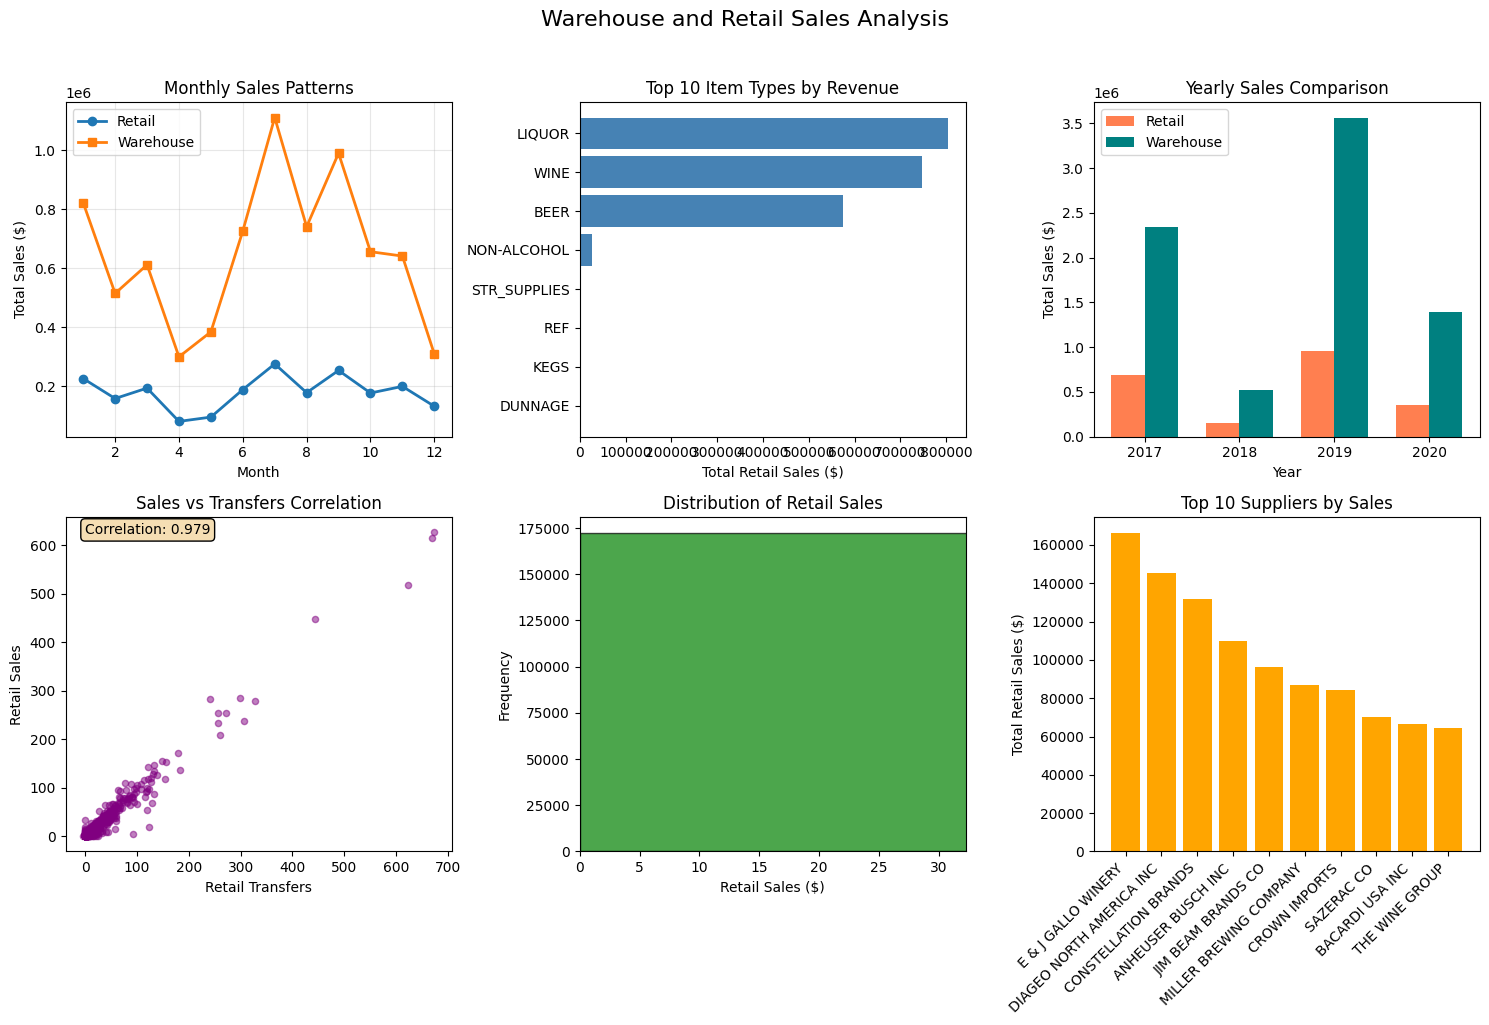

STATISTICAL INSIGHTS
--------------------------------------------------

1. SEASONAL PATTERNS:
   Peak sales month: 12 ($9.08 avg)
   Lowest sales month: 1 ($5.98 avg)
   Seasonal variation: 51.7% difference

2. ITEM TYPE PERFORMANCE:
   Top 5 Item Types by Total Revenue:
   - LIQUOR: $802,691 total, $12.37 avg per transaction
   - WINE: $746,499 total, $3.98 avg per transaction
   - BEER: $574,221 total, $13.54 avg per transaction
   - NON-ALCOHOL: $27,150 total, $14.30 avg per transaction
   - STR_SUPPLIES: $2,235 total, $7.03 avg per transaction

3. SALES CHANNEL ANALYSIS:
   Total Retail Sales: $2,153,459.39
   Total Warehouse Sales: $7,802,401.28
   Retail/Warehouse Ratio: 0.28:1

4. CORRELATION INSIGHTS:
   Correlation Matrix:
                  RETAIL_SALES  RETAIL_TRANSFERS  WAREHOUSE_SALES
RETAIL_SALES             1.000             0.979            0.501
RETAIL_TRANSFERS         0.979             1.000            0.493
WAREHOUSE_SALES          0.501             0.493           

In [ ]:
# handle missing values if any
df = df.dropna()

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Warehouse and Retail Sales Analysis", fontsize=16, y=1.02)

# 1. Monthly Sales Trends
monthly_sales = df.groupby("MONTH")[["RETAIL_SALES", "WAREHOUSE_SALES"]].sum()
axes[0, 0].plot(
    monthly_sales.index,
    monthly_sales["RETAIL_SALES"],
    label="Retail",
    marker="o",
    linewidth=2,
)
axes[0, 0].plot(
    monthly_sales.index,
    monthly_sales["WAREHOUSE_SALES"],
    label="Warehouse",
    marker="s",
    linewidth=2,
)
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Total Sales ($)")
axes[0, 0].set_title("Monthly Sales Patterns")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Sales by Item Type
item_sales = (
    df.groupby("ITEM_TYPE")["RETAIL_SALES"].sum().sort_values(ascending=True).tail(10)
)
axes[0, 1].barh(range(len(item_sales)), item_sales.values, color="steelblue")
axes[0, 1].set_yticks(range(len(item_sales)))
axes[0, 1].set_yticklabels(item_sales.index)
axes[0, 1].set_xlabel("Total Retail Sales ($)")
axes[0, 1].set_title("Top 10 Item Types by Revenue")

# 3. Yearly Trends
yearly_sales = df.groupby("YEAR")[["RETAIL_SALES", "WAREHOUSE_SALES"]].sum()
x = np.arange(len(yearly_sales.index))
width = 0.35
axes[0, 2].bar(
    x - width / 2, yearly_sales["RETAIL_SALES"], width, label="Retail", color="coral"
)
axes[0, 2].bar(
    x + width / 2,
    yearly_sales["WAREHOUSE_SALES"],
    width,
    label="Warehouse",
    color="teal",
)
axes[0, 2].set_xlabel("Year")
axes[0, 2].set_ylabel("Total Sales ($)")
axes[0, 2].set_title("Yearly Sales Comparison")
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(yearly_sales.index)
axes[0, 2].legend()

# 4. Correlation: Retail Sales vs Transfers
# Sample data for better visualization (every 100th row)
sample_df = df.iloc[::100].copy()
axes[1, 0].scatter(
    sample_df["RETAIL_TRANSFERS"],
    sample_df["RETAIL_SALES"],
    alpha=0.5,
    s=20,
    color="purple",
)
axes[1, 0].set_xlabel("Retail Transfers")
axes[1, 0].set_ylabel("Retail Sales")
axes[1, 0].set_title("Sales vs Transfers Correlation")
# Add correlation coefficient
corr = df["RETAIL_TRANSFERS"].corr(df["RETAIL_SALES"])
axes[1, 0].text(
    0.05,
    0.95,
    f"Correlation: {corr:.3f}",
    transform=axes[1, 0].transAxes,
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="wheat"),
)

# 5. Distribution of Retail Sales
axes[1, 1].hist(
    df["RETAIL_SALES"][df["RETAIL_SALES"] > 0],
    bins=50,
    color="green",
    alpha=0.7,
    edgecolor="black",
)
axes[1, 1].set_xlabel("Retail Sales ($)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Distribution of Retail Sales")
axes[1, 1].set_xlim(0, np.percentile(df["RETAIL_SALES"], 95))

# 6. Top Suppliers Performance
supplier_sales = (
    df.groupby("SUPPLIER")["RETAIL_SALES"].sum().sort_values(ascending=False).head(10)
)
axes[1, 2].bar(range(len(supplier_sales)), supplier_sales.values, color="orange")
axes[1, 2].set_xticks(range(len(supplier_sales)))
axes[1, 2].set_xticklabels(supplier_sales.index, rotation=45, ha="right")
axes[1, 2].set_ylabel("Total Retail Sales ($)")
axes[1, 2].set_title("Top 10 Suppliers by Sales")

plt.tight_layout()
plt.show()

# statistical Summary
print("STATISTICAL INSIGHTS")
print("-" * 50)

# 1. Seasonal Analysis
print("\n1. SEASONAL PATTERNS:")
monthly_avg = df.groupby("MONTH")["RETAIL_SALES"].mean()
peak_month = monthly_avg.idxmax()
low_month = monthly_avg.idxmin()
print(f"   Peak sales month: {peak_month} (${monthly_avg[peak_month]:,.2f} avg)")
print(f"   Lowest sales month: {low_month} (${monthly_avg[low_month]:,.2f} avg)")
print(
    f"   Seasonal variation: {(monthly_avg.max()/monthly_avg.min() - 1)*100:.1f}% difference"
)

# 2. Item Type Analysis
print("\n2. ITEM TYPE PERFORMANCE:")
top_items = (
    df.groupby("ITEM_TYPE")["RETAIL_SALES"]
    .agg(["sum", "mean", "count"])
    .sort_values("sum", ascending=False)
    .head(5)
)
print("   Top 5 Item Types by Total Revenue:")
for idx, row in top_items.iterrows():
    print(
        f"   - {idx}: ${row['sum']:,.0f} total, ${row['mean']:,.2f} avg per transaction"
    )

# 3. sales Channel Comparison
print("\n3. SALES CHANNEL ANALYSIS:")
total_retail = df["RETAIL_SALES"].sum()
total_warehouse = df["WAREHOUSE_SALES"].sum()
print(f"   Total Retail Sales: ${total_retail:,.2f}")
print(f"   Total Warehouse Sales: ${total_warehouse:,.2f}")
print(f"   Retail/Warehouse Ratio: {total_retail/total_warehouse:.2f}:1")

# 4. correlation Analysis
print("\n4. CORRELATION INSIGHTS:")
correlation_matrix = df[["RETAIL_SALES", "RETAIL_TRANSFERS", "WAREHOUSE_SALES"]].corr()
print("   Correlation Matrix:")
print(correlation_matrix.round(3))

# 5. growth Analysis
if len(df["YEAR"].unique()) > 1:
    yearly_growth = df.groupby("YEAR")["RETAIL_SALES"].sum()
    yoy_growth = yearly_growth.pct_change().mean() * 100
    print(f"\n5. GROWTH METRICS:")
    print(f"   Average Year-over-Year Growth: {yoy_growth:.1f}%")

# Create a summary DataFrame for export
summary_stats = pd.DataFrame(
    {
        "Metric": [
            "Total Records",
            "Total Retail Sales",
            "Total Warehouse Sales",
            "Avg Retail Sale",
            "Peak Month",
            "Correlation (Sales vs Transfers)",
        ],
        "Value": [
            len(df),
            f"${total_retail:,.2f}",
            f"${total_warehouse:,.2f}",
            f"${df['RETAIL_SALES'].mean():,.2f}",
            peak_month,
            f"{corr:.3f}",
        ],
    }
)

print("SUMMARY TABLE")
print("-" * 50)
print(summary_stats.to_string(index=False))